# Classification Neural Network

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing prepared dataset
import pickle
input = open('data.pkl', 'rb')
obj = pickle.load(input)
input.close()
X_train = obj["X_train"]
X_test = obj["X_test"]
y_train = obj["y_train"]
y_test = obj["y_test"]

In [3]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
# Initialising the ANN
cnn = Sequential()

# Adding the input layer and the first hidden layer
cnn.add(Dense(2, activation = 'relu', input_dim = 2))

# Adding the output layer
cnn.add(Dense(2, activation = 'sigmoid'))

# Adding the output layer
cnn.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
import sys
sys.setrecursionlimit(10000)

In [20]:
# Fitting the ANN to the Training set
history = cnn.fit(X_train, y_train, batch_size = 64, epochs = 100, validation_data=(X_test, y_test))

Epoch 1/100
8/8 [==============================] - 1s 34ms/step - loss: 0.7247 - accuracy: 0.4979 - val_loss: 0.7154 - val_accuracy: 0.5500
Epoch 2/100
8/8 [==============================] - 0s 8ms/step - loss: 0.7227 - accuracy: 0.4979 - val_loss: 0.7142 - val_accuracy: 0.5500
Epoch 3/100
8/8 [==============================] - 0s 16ms/step - loss: 0.7210 - accuracy: 0.4917 - val_loss: 0.7130 - val_accuracy: 0.5333
Epoch 4/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7194 - accuracy: 0.4854 - val_loss: 0.7119 - val_accuracy: 0.5250
Epoch 5/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7179 - accuracy: 0.4729 - val_loss: 0.7109 - val_accuracy: 0.5250
Epoch 6/100
8/8 [==============================] - 0s 11ms/step - loss: 0.7163 - accuracy: 0.4646 - val_loss: 0.7098 - val_accuracy: 0.5250
Epoch 7/100
8/8 [==============================] - 0s 10ms/step - loss: 0.7150 - accuracy: 0.4646 - val_loss: 0.7088 - val_accuracy: 0.5083
Epoch 8/100
8/8 [====

8/8 [==============================] - 0s 9ms/step - loss: 0.6843 - accuracy: 0.7333 - val_loss: 0.6845 - val_accuracy: 0.7833
Epoch 60/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6836 - accuracy: 0.7333 - val_loss: 0.6836 - val_accuracy: 0.7917
Epoch 61/100
8/8 [==============================] - 0s 12ms/step - loss: 0.6828 - accuracy: 0.7354 - val_loss: 0.6827 - val_accuracy: 0.7917
Epoch 62/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6820 - accuracy: 0.7354 - val_loss: 0.6818 - val_accuracy: 0.8000
Epoch 63/100
8/8 [==============================] - 0s 8ms/step - loss: 0.6811 - accuracy: 0.7375 - val_loss: 0.6808 - val_accuracy: 0.8000
Epoch 64/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6801 - accuracy: 0.7396 - val_loss: 0.6797 - val_accuracy: 0.8000
Epoch 65/100
8/8 [==============================] - 0s 11ms/step - loss: 0.6791 - accuracy: 0.7500 - val_loss: 0.6787 - val_accuracy: 0.8000
Epoch 66/100
8/8 [============

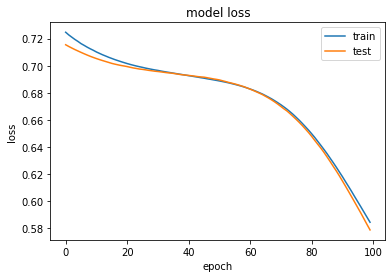

In [21]:
# Plotting loss & accuracy
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [22]:
# Predicting the Test set results
y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5)

In [23]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[59  7]
 [ 9 45]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


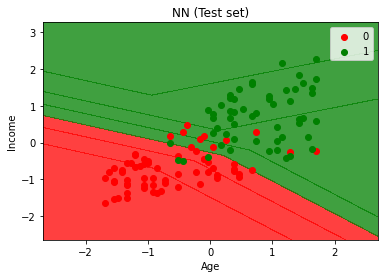

In [16]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, cnn.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()